## Connor and Bryn

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
wine = pd.read_csv('winequality-red.csv', delimiter = ';')
wine = pd.DataFrame(wine)
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
wine[wine.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [4]:
wine.info()
wine['quality'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


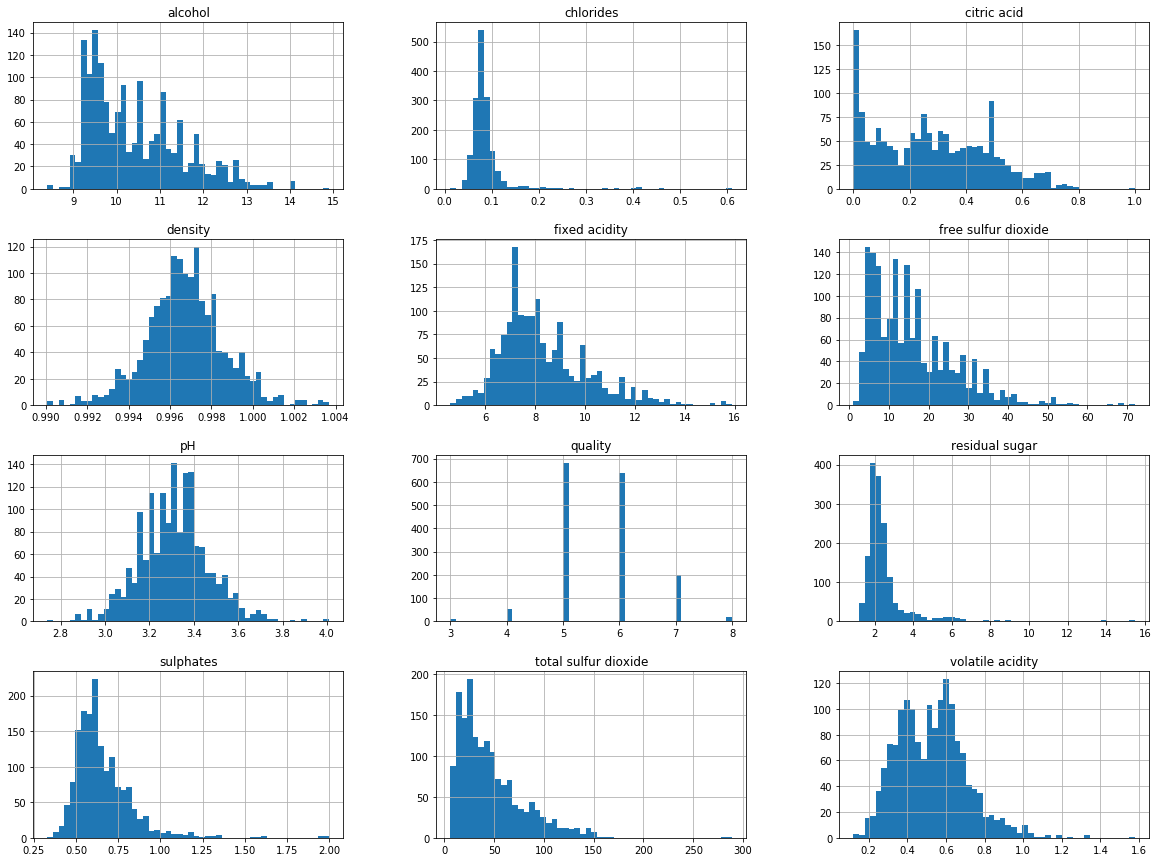

In [6]:
wine.hist(bins=50, figsize=(20,15))
plt.show()

# Find Outliers

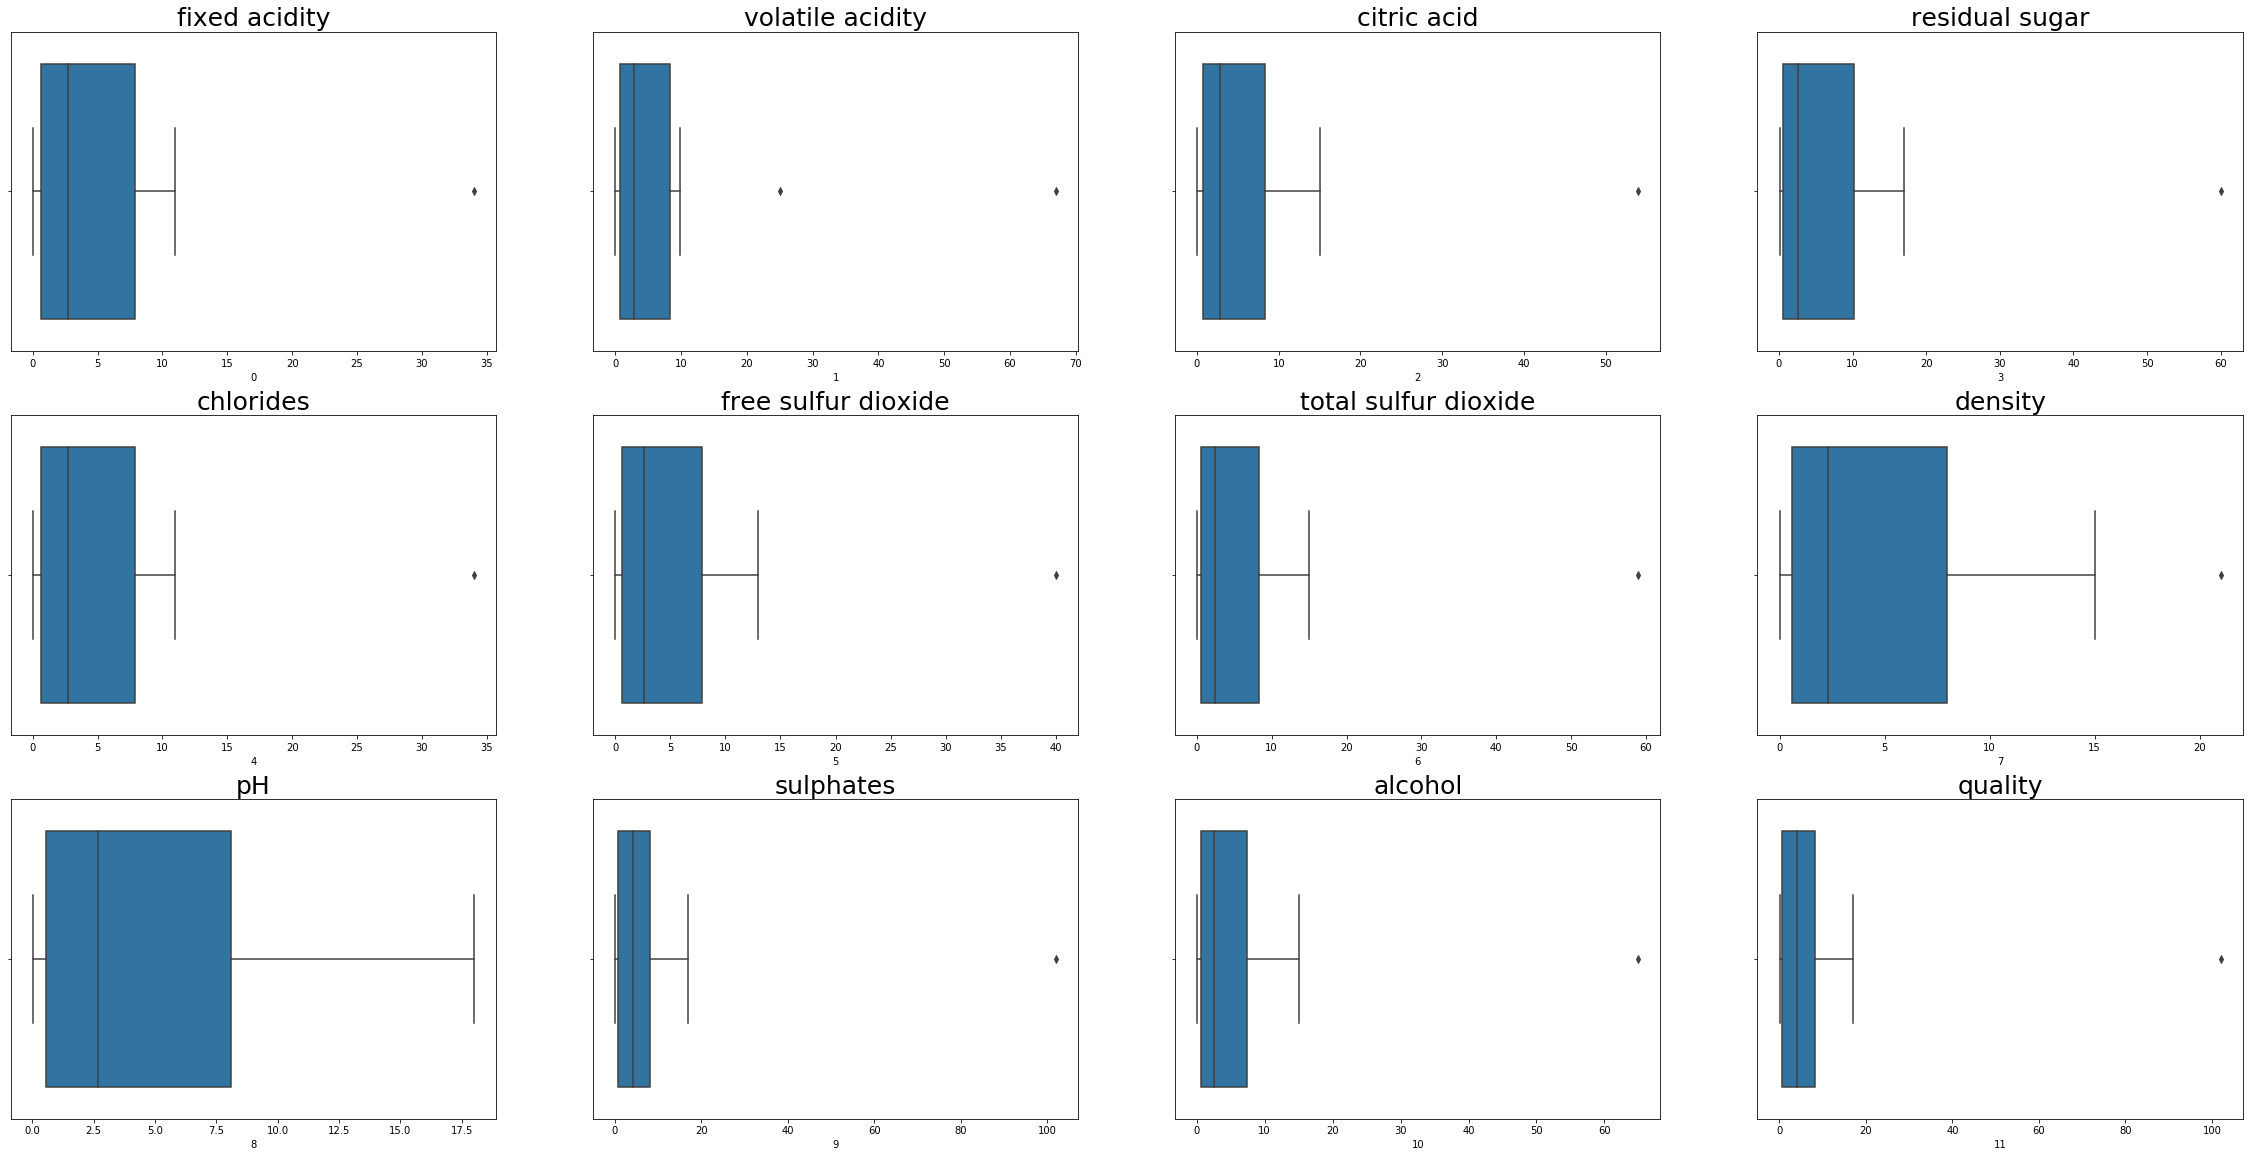

In [7]:
feature_labels = list(wine.columns)


plt.figure(figsize = (40, 20))

for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.title(feature_labels[i], fontsize = 25)
    sns.boxplot(x=wine.iloc[i])
   

In [8]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [9]:
S1 = wine.shape
S1

(1599, 12)

In [10]:
wine_df_out = wine[~((wine < (Q1 - 1.5 * IQR)) |(wine > (Q3 + 1.5 * IQR))).any(axis=1)]
S2 = wine_df_out.shape
S2

(1179, 12)

In [11]:
outliers = S1[0] - S2[0]
outliers

420

In [12]:
outliers/1598*100

26.282853566958696

# Linear Regression

In [13]:
y = wine_df_out['quality']
X = wine_df_out.drop(['quality'], axis = 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_lin_pred = lin_reg_pred = lin_reg.predict(X_test)
y_lin_fit = lin_reg_fit = lin_reg.predict(X_train)

In [16]:
#Results on Training Data
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_lin_fit))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_lin_fit)))  

Mean Squared Error: 0.3161701898623411
Root Mean Squared Error: 0.5622901296149


# Base Model

In [17]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)
y_fit = regressor.predict(X_train)

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.436864406779661
Mean Squared Error: 0.3605508474576271
Root Mean Squared Error: 0.6004588640844826


# An attempt at feature engineering

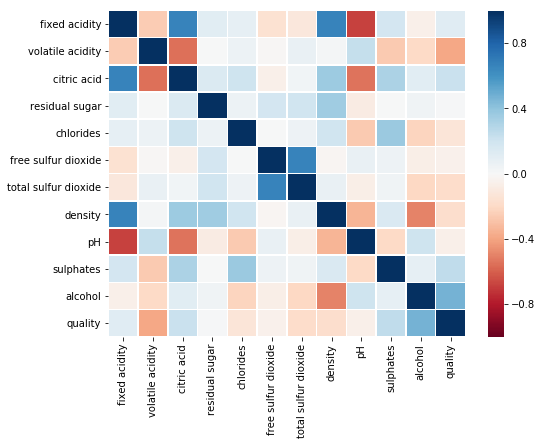

In [19]:
corr_matrix = wine.corr()
a=False
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, 
            vmin = -1, vmax = 1,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            linewidths=.5,
            cmap = 'RdBu')


In [20]:
corr_q = corr_matrix["quality"].sort_values(ascending=False)
corr_q

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [21]:
#from the internet
#https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

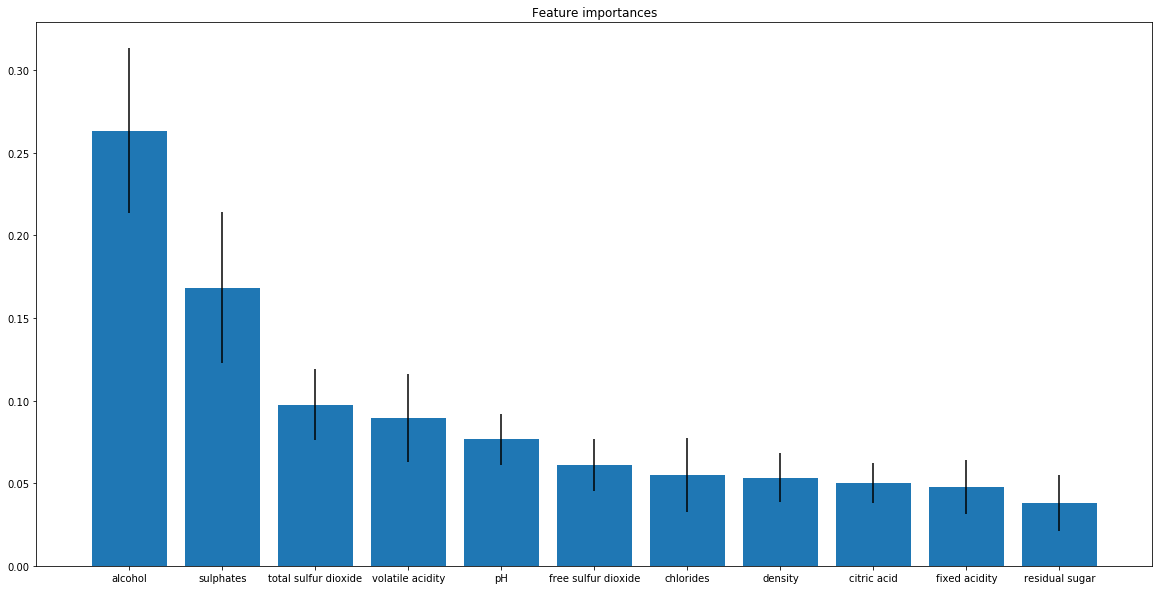

In [22]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
    
    
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

'''
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({})".format(f + 1, wine.columns.values[indices[f]], importances[indices[f]]))
'''

# Plot the feature importances of the forest
plt.figure(figsize = (20, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), wine.columns.values[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

In [23]:
comp = pd.concat([feature_importances, corr_q.drop('quality')], axis=1, sort=False)
comp.rename(columns={'quality' : 'corr (quality)'}, inplace = True)
#comp['abs corr'] = abs(comp['corr (quality)'])
comp

,importance,corr (quality)
alcohol,0.263357,0.476166
sulphates,0.168307,0.251397
total sulfur dioxide,0.097448,-0.185100
volatile acidity,0.089250,-0.390558
pH,0.076466,-0.057731
free sulfur dioxide,0.061086,-0.050656
chlorides,0.054906,-0.128907
density,0.053387,-0.174919
citric acid,0.050055,0.226373
fixed acidity,0.047733,0.124052


In [24]:
# Use top 4 most important features 
y1=wine['quality']
columns = ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide']
X1 = pd.DataFrame(wine, columns = columns)
X1.head()

,alcohol,sulphates,volatile acidity,total sulfur dioxide
0,9.4,0.56,0.70,34.0
1,9.8,0.68,0.88,67.0
2,9.8,0.65,0.76,54.0
3,9.8,0.58,0.28,60.0
4,9.4,0.56,0.70,34.0


In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

In [26]:
regressor = RandomForestRegressor(n_estimators=50, random_state=0)  
regressor.fit(X1_train, y1_train)  
y1_pred = regressor.predict(X1_test)
y1_fit = regressor.predict(X1_train)

In [27]:
#Results on Test Data
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Squared Error: 0.363415
Root Mean Squared Error: 0.6028391161827507


# Hyperparameter Tuning

In [28]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=0)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [29]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [30]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6302346476412937 {'max_features': 2, 'n_estimators': 3}
0.5581175754227403 {'max_features': 2, 'n_estimators': 10}
0.5377764290921003 {'max_features': 2, 'n_estimators': 30}
0.6305150219330489 {'max_features': 4, 'n_estimators': 3}
0.5552888484349225 {'max_features': 4, 'n_estimators': 10}
0.5364799804391978 {'max_features': 4, 'n_estimators': 30}
0.6169133380712659 {'max_features': 6, 'n_estimators': 3}
0.5678931687504857 {'max_features': 6, 'n_estimators': 10}
0.5422754688395022 {'max_features': 6, 'n_estimators': 30}
0.6262021548052124 {'max_features': 8, 'n_estimators': 3}
0.567911841768781 {'max_features': 8, 'n_estimators': 10}
0.5428867760485073 {'max_features': 8, 'n_estimators': 30}
0.614712973337932 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.5507634727986661 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.6174860567507635 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.5465790651344654 {'bootstrap': False, 'max_features': 3, 'n_e

In [31]:
test = grid_search.best_estimator_.fit(X_train, y_train)
best_y_pred = test.predict(X_test)
best_y_fit = test.predict(X_train)
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [32]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, best_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, best_y_pred)))

Mean Squared Error: 0.3047881355932203
Root Mean Squared Error: 0.5520762045163877


In [38]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
        'max_depth': randint(low = 1, high = 30)
        
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019ACF742A90>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019ACF72A160>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019ACF72AEB8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [34]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5485210412473623 {'max_depth': 7, 'max_features': 4, 'n_estimators': 93}
0.5320523920529187 {'max_depth': 15, 'max_features': 3, 'n_estimators': 72}
0.5310308929374757 {'max_depth': 29, 'max_features': 5, 'n_estimators': 103}
0.5281472849621944 {'max_depth': 26, 'max_features': 3, 'n_estimators': 75}
0.5342896890338698 {'max_depth': 11, 'max_features': 5, 'n_estimators': 100}
0.5440019257202392 {'max_depth': 8, 'max_features': 3, 'n_estimators': 150}
0.5280066228638699 {'max_depth': 21, 'max_features': 2, 'n_estimators': 88}
0.534141472284788 {'max_depth': 12, 'max_features': 6, 'n_estimators': 38}
0.6004395883273007 {'max_depth': 2, 'max_features': 4, 'n_estimators': 21}
0.6347949191891812 {'max_depth': 1, 'max_features': 4, 'n_estimators': 58}


In [35]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=21,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=88, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [36]:
final_model = rnd_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_model_fit = final_model.predict(X_train)

final_mse = metrics.mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [37]:
final_rmse

0.544224213807362